<a href="https://colab.research.google.com/github/Magnificent-steiner0/Deep-Learning/blob/main/Perceptron/perceptronSGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
class PerceptronSGD:
  def __init__(self, learning_rate=0.1, max_iter=1000):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.weights = None
    self.bias = None


  def activation(self, x): # a step function (sign function)
    return np.where(x>0, 1, -1)


  def fit(self, X, y): # train perceptron with stochastic gradient descent
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.max_iter):
      for i in range(n_samples):
        linear_output = np.dot(X[i], self.weights) + self.bias
        y_predicted = self.activation(linear_output)

        update = self.learning_rate * (y[i]-y_predicted)
        self.weights += update * X[i]
        self.bias += update


  def predict(self, X):
    linear_output = np.dot(X, self.weights) + self.bias
    return self.activation(linear_output)


  def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(6, 5))
        sns.set_style("whitegrid")

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=100)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

        Z = self.activation(np.dot(np.c_[xx.ravel(), yy.ravel()], self.weights) + self.bias)
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title("Perceptron Decision Boundary")
        plt.show()

Predictions: [ 1  1  1 -1]


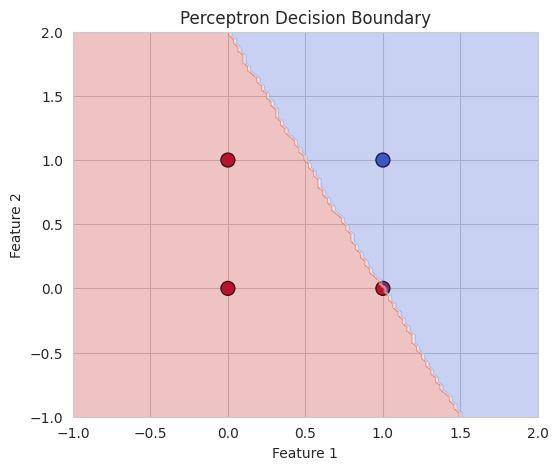

In [5]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, -1])

perceptron = PerceptronSGD(learning_rate=0.1, max_iter=1000)
perceptron.fit(X, y)

predictions = perceptron.predict(X)
print("Predictions:", predictions)

perceptron.plot_decision_boundary(X, y)